# Uber Supply and Demand Case Study

In [1]:
# importing important libraries

import numpy as np
import pandas as pd

In [2]:
# importing libraries for Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# surpressing warnings

import warnings
warnings.filterwarnings('ignore')

## Data Sourcing

In [4]:
# Importing the csv file
uber = pd.read_csv('/Users/Aishwarya/Downloads/Uber Request Data.csv')

In [5]:
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp  
0  11/07/16 13:00  
1  11/07/16 18:47  
2   12/07/16 9:58  
3  12/07/16 22:03  
4   13/07/16 9:25

In [6]:
uber.tail()

Request id Pickup point  Driver id             Status Request timestamp  \
6740        6745         City        NaN  No Cars Available    15/07/16 23:49   
6741        6752      Airport        NaN  No Cars Available    15/07/16 23:50   
6742        6751         City        NaN  No Cars Available    15/07/16 23:52   
6743        6754         City        NaN  No Cars Available    15/07/16 23:54   
6744        6753      Airport        NaN  No Cars Available    15/07/16 23:55   

     Drop timestamp  
6740            NaN  
6741            NaN  
6742            NaN  
6743            NaN  
6744            NaN

## Understanding the data

In [9]:
# checkig the dataframe
print(uber.shape)
print(uber.describe())
print(uber.info())

(6745, 6)
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


In [10]:
# Checking for duplicate rows
uber.duplicated(subset='Request id',keep= False).sum()

0

In [11]:
# Check for NA values
print(uber.isnull().values.any())
print(uber.isnull().sum(axis = 0))

True
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [12]:
# Checking for NA values in Request Id, Pickup Point, Status and Request Timestamp

In [13]:
# Request Id

print(uber['Request id'].isnull().values.any())
print(uber['Request id'].isnull().values.sum())

False
0


In [14]:
# Pickup Point

print(uber['Pickup point'].isnull().values.any())
print(uber['Pickup point'].isnull().values.sum())

False
0


In [15]:
# Status 

print(uber['Status'].isnull().values.any())
print(uber['Status'].isnull().values.sum())

False
0


In [16]:
# Checking the datatypes
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

## Manipulating the data for better understanding

In [17]:
# Converting 'Request timestamp' column to datetime object

uber['Request_Date_Time'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp   Request_Date_Time  
0  11/07/16 13:00 2016-07-11 11:51:00  
1  11/07/16 18:47 2016-07-11 17:57:00  
2   12/07/16 9:58 2016-07-12 09:17:00  
3  12/07/16 22:03 2016-07-12 21:08:00  
4   13/07/16 9:25 2016-07-13 08:33:00

In [18]:
# Converting 'Drop timestamp' column to datetime object

uber['Drop_Date_Time'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp   Request_Date_Time      Drop_Date_Time  
0  11/07/16 13:00 2016-07-11 11:51:00 2016-07-11 13:00:00  
1  11/07/16 18:47 2016-07-11 17:57:00 2016-07-11 18:47:00  
2   12/07/16 9:58 2016-07-12 09:17:00 2016-07-12 09:58:00  
3  12/07/16 22:03 2016-07-12 21:08:00 2016-07-12 22:03:00  
4   13/07/16 9:25 2016-07-13 08:33:00 2016-07-13 09:25:00

In [19]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   Request_Date_Time  6745 non-null   datetime64[ns]
 7   Drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


In [22]:
# Extracting day from Request timestamp
uber['request_Date'] = uber['Request_Date_Time'].dt.date
uber['request_Time'] = uber['Request_Date_Time'].dt.time
uber.head(10)

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   
5        3879      Airport        1.0  Trip Completed    13/07/16 21:57   
6        4270      Airport        1.0  Trip Completed     14/07/16 6:15   
7        5510      Airport        1.0  Trip Completed     15/07/16 5:11   
8        6248         City        1.0  Trip Completed    15/07/16 17:57   
9         267         City        2.0  Trip Completed     11/07/16 6:46   

   Drop timestamp   Request_Date_Time      Drop_Date_Time request_Date  \
0  11/07/16 13:00 2016-07-11 11:51:00 2016-07-11 13:00:00   2016-07-11   
1  11/07/16 18:47 2016-07-11 17:57:00 2016-07-11 18:47:00   2016-07-11   
2   12/07/16 9:58 2016-07-12 09:17:00 2016-07-12 09:58:00   2016-07-12   
3  12/07/16 22:03 2016-07-12 21:08:00 2016-07-12 22:03:00   2016-07-12   
4   13/07/16 9:25 2016-07-13 08:33:00 2016-07-13 09:25:00   2016-07-13   
5  13/07/16 22:28 2016-07-13 21:57:00 2016-07-13 22:28:00   2016-07-13   
6   14/07/16 7:13 2016-07-14 06:15:00 2016-07-14 07:13:00   2016-07-14   
7   15/07/16 6:07 2016-07-15 05:11:00 2016-07-15 06:07:00   2016-07-15   
8  15/07/16 18:50 2016-07-15 17:57:00 2016-07-15 18:50:00   2016-07-15   
9   11/07/16 7:25 2016-07-11 06:46:00 2016-07-11 07:25:00   2016-07-11   

  request_Time  
0     11:51:00  
1     17:57:00  
2     09:17:00  
3     21:08:00  
4     08:33:00  
5     21:57:00  
6     06:15:00  
7     05:11:00  
8     17:57:00  
9     06:46:00

In [37]:
#extracting day of week from request date time
uber['request_day'] = uber['Request_Date_Time'].dt.day_name()
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp   Request_Date_Time      Drop_Date_Time request_Date  \
0  11/07/16 13:00 2016-07-11 11:51:00 2016-07-11 13:00:00   2016-07-11   
1  11/07/16 18:47 2016-07-11 17:57:00 2016-07-11 18:47:00   2016-07-11   
2   12/07/16 9:58 2016-07-12 09:17:00 2016-07-12 09:58:00   2016-07-12   
3  12/07/16 22:03 2016-07-12 21:08:00 2016-07-12 22:03:00   2016-07-12   
4   13/07/16 9:25 2016-07-13 08:33:00 2016-07-13 09:25:00   2016-07-13   

  request_Time Request Time Slot  request_hour request_DayOfWeek request_day  
0     11:51:00      Late Morning            11            Monday      Monday  
1     17:57:00           Evening            17            Monday      Monday  
2     09:17:00      Late Morning             9           Tuesday     Tuesday  
3     21:08:00             Night            21           Tuesday     Tuesday  
4     08:33:00           Morning             8         Wednesday   Wednesday

In [28]:
# Extracting hour from Request timestamp
uber['request_hour'] = uber['Request_Date_Time'].dt.hour

## Data Analysis

<AxesSubplot:xlabel='Status'>

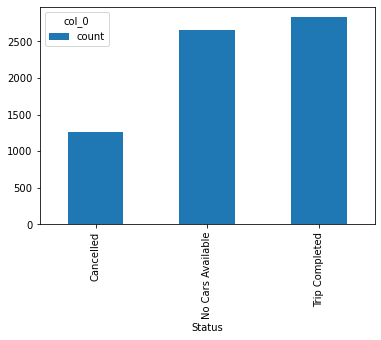

In [25]:
# Plotting a plot of hour and day w.r.t. status
status = pd.crosstab(index = uber["Status"], columns="count")     
status.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

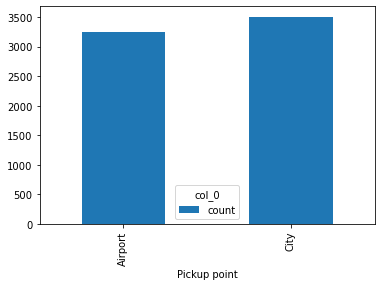

In [26]:
# Plotting a plot of hour and day w.r.t. Pickup Point
PUP = pd.crosstab(index = uber["Pickup point"], columns="count")     
PUP.plot.bar()

In [34]:
# creating a time slot for various time period of day

uber['Request Time Slot'] = 'Early Morning'
uber.loc[uber['request_hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uber.loc[uber['request_hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uber.loc[uber['request_hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uber.loc[uber['request_hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uber.loc[uber['request_hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp   Request_Date_Time      Drop_Date_Time request_Date  \
0  11/07/16 13:00 2016-07-11 11:51:00 2016-07-11 13:00:00   2016-07-11   
1  11/07/16 18:47 2016-07-11 17:57:00 2016-07-11 18:47:00   2016-07-11   
2   12/07/16 9:58 2016-07-12 09:17:00 2016-07-12 09:58:00   2016-07-12   
3  12/07/16 22:03 2016-07-12 21:08:00 2016-07-12 22:03:00   2016-07-12   
4   13/07/16 9:25 2016-07-13 08:33:00 2016-07-13 09:25:00   2016-07-13   

  request_Time Request Time Slot  request_hour request_DayOfWeek  
0     11:51:00      Late Morning            11            Monday  
1     17:57:00           Evening            17            Monday  
2     09:17:00      Late Morning             9           Tuesday  
3     21:08:00             Night            21           Tuesday  
4     08:33:00           Morning             8         Wednesday

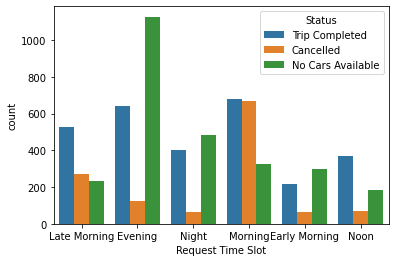

In [35]:
# plot time slot w.r.t. status
sns.countplot(x=uber['Request Time Slot'],hue=uber['Status'],data=uber)
plt.show()

### Conclusions:
- Most No Cars Available are in the Evening.
- Most Cancelled trips are in the Morning.

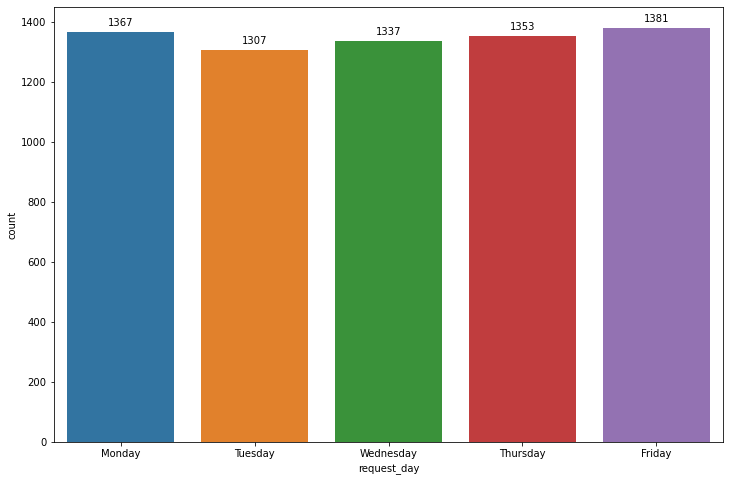

In [38]:
#looking to find the request count vs daysof week
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='request_day', data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

<AxesSubplot:xlabel='Pickup point,Request Time Slot'>

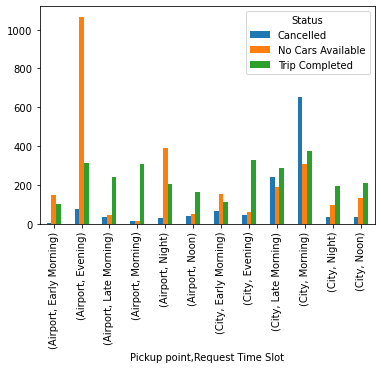

In [39]:
# Plot to find the count of the status, according to both pickup point and the time slot

pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

## Supply and Demand Gap Calculation

In [40]:
# As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value

uber['Demand'] = 1

In [41]:
# As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.

uber['Supply'] = 0
uber.loc[(uber['Status'] == 'Trip Completed'),'Supply'] = 1

In [42]:
#Demand Supply Gap can be defined as a difference between Demand and Supply

uber['Gap'] = uber['Demand'] - uber['Supply']
uber.loc[uber['Gap']==0,'Gap'] = 'Trip Completed'
uber.loc[uber['Gap']==1,'Gap'] = 'Trip Not Completed'

In [43]:
# Removing unnecessary columns

uber = uber.drop(['request_hour', 'Demand', 'Supply'], axis=1)

In [44]:
uber.head()

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp   Request_Date_Time      Drop_Date_Time request_Date  \
0  11/07/16 13:00 2016-07-11 11:51:00 2016-07-11 13:00:00   2016-07-11   
1  11/07/16 18:47 2016-07-11 17:57:00 2016-07-11 18:47:00   2016-07-11   
2   12/07/16 9:58 2016-07-12 09:17:00 2016-07-12 09:58:00   2016-07-12   
3  12/07/16 22:03 2016-07-12 21:08:00 2016-07-12 22:03:00   2016-07-12   
4   13/07/16 9:25 2016-07-13 08:33:00 2016-07-13 09:25:00   2016-07-13   

  request_Time Request Time Slot request_DayOfWeek request_day             Gap  
0     11:51:00      Late Morning            Monday      Monday  Trip Completed  
1     17:57:00           Evening            Monday      Monday  Trip Completed  
2     09:17:00      Late Morning           Tuesday     Tuesday  Trip Completed  
3     21:08:00             Night           Tuesday     Tuesday  Trip Completed  
4     08:33:00           Morning         Wednesday   Wednesday  Trip Completed

<AxesSubplot:xlabel='Gap', ylabel='count'>

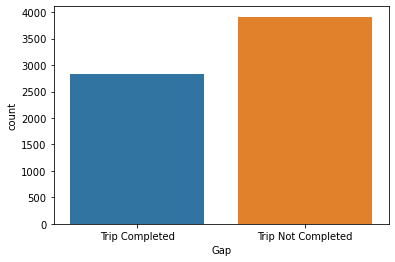

In [45]:
#Plot to count the number of requests that was completed and which was not

sns.countplot(x=uber['Gap'], data = uber)

<AxesSubplot:xlabel='Request Time Slot'>

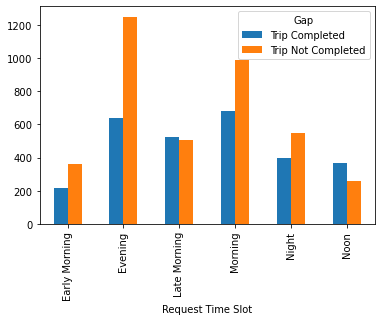

In [46]:
# Plot to count the number of requests that was completed and which was not, against the time slot

gap_timeslot_df = pd.DataFrame(uber.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

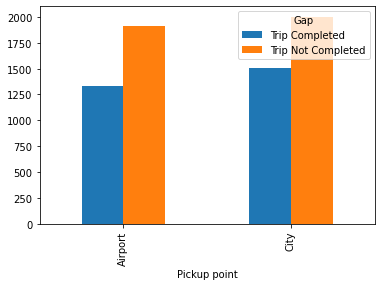

In [47]:
# Plot to count the number of requests that was completed and which was not, against pickup point

gap_pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

<AxesSubplot:xlabel='Request Time Slot,Pickup point'>

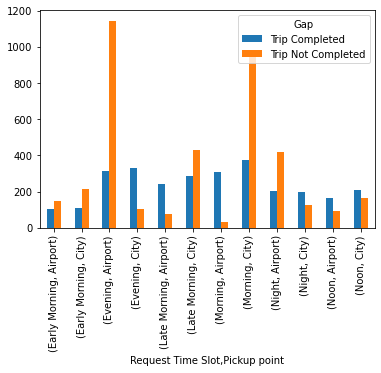

In [48]:
# Plot to count the number of requests that was completed and which was not, for the final analysis

gap_main_df = pd.DataFrame(uber.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

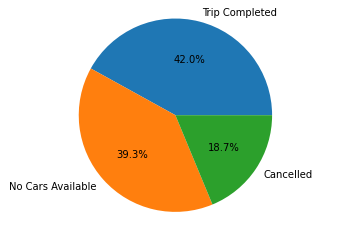

In [49]:
#Status distribution in pie Chart

uber.loc[(uber.Status =="Trip Completed"),'TripComp'] =1
uber.loc[(uber.Status =="No Cars Available"),'NoCars'] =1
uber.loc[(uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [uber['TripComp'].value_counts()[1],
         uber['NoCars'].value_counts()[1],
         uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

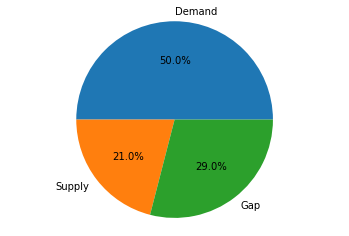

In [50]:
#percentage  distribution in pie Chart

uber.loc[(uber.Status == 'Trip Completed') | (uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'demand'] =1
uber.loc[(uber.Status == 'Trip Completed'), 'supply']=1
uber.loc[(uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [uber['demand'].value_counts()[1],
         uber['supply'].value_counts()[1],
         uber['gap'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

### Observation so far:
1. Morning hours :There is no high demand for cabs from airport to city 
2. Evening hours: There is no high demand for cabs from city to airport

- The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

- Status: "No car available"
- Where is it happening: Airport - i.e airport to city
- When is it happening: Evening 

- Status: "Cancelled"
- Where is it happening: City - i.e city to airport
- When is it happening: Morning

### RECOMMENDATION:
- Provide incentives for airport trips during peak time.
- Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
- Promote continuous trip to airport with incentives.